# 타이타닉

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [8]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic_df.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [11]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [13]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

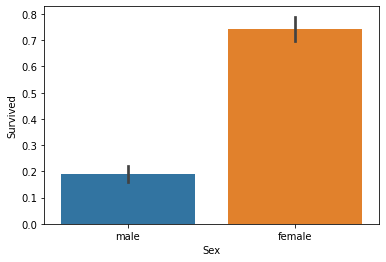

In [15]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

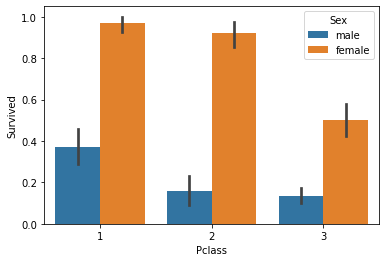

In [18]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data = titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

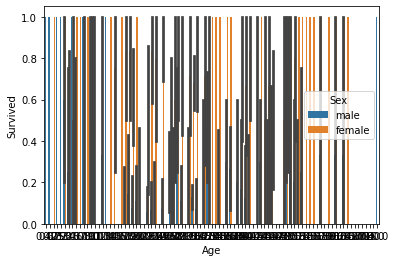

In [19]:
sns.barplot(x='Age',y='Survived',hue='Sex',data = titanic_df)

In [20]:
def get_category(age):
    cat =''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

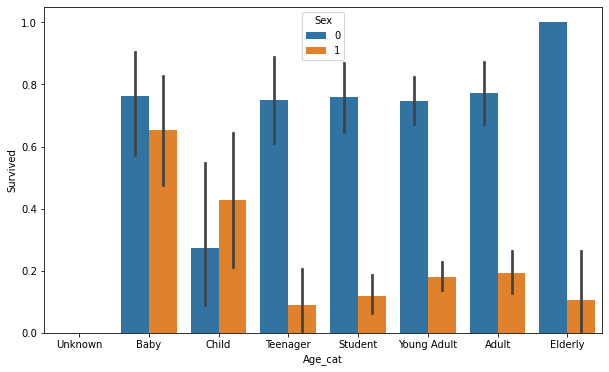

In [33]:
plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
def encode_features(dataDf):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        dataDf[feature] = LabelEncoder().fit_transform(dataDf[feature])
    return dataDf

In [36]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [37]:
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

def transform_feafures(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [39]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_feafures(X_titanic_df)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                y_titanic_df,
                                                test_size=0.2,
                                                random_state=11)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [44]:
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
dt_pred =  dt_clf.predict(X_test)
rf_pred =  rf_clf.predict(X_test)
lr_pred =  lr_clf.predict(X_test)

In [46]:
print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844
